In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#TODO: Find a better way to parse csv files with pandas
list_of_animals = []

observations_df = pd.read_csv('observations.csv', keep_default_na=False, na_values=[""])
info_df = pd.read_csv('species_info.csv', keep_default_na=False, na_values=[""])

for col in info_df:
    print(info_df[col].unique())

inner_merge_df = pd.merge(left=observations_df, right=info_df, left_on='scientific_name', right_on='scientific_name')
inner_merge_df

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vas. Plant' 'NonVas. Plant']
['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vas. Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,NaN
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN
25629,Dichanthelium depauperatum,Bryce National Park,80,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vas. Plant,"Green Panic-Grass, Panic Grass",NaN


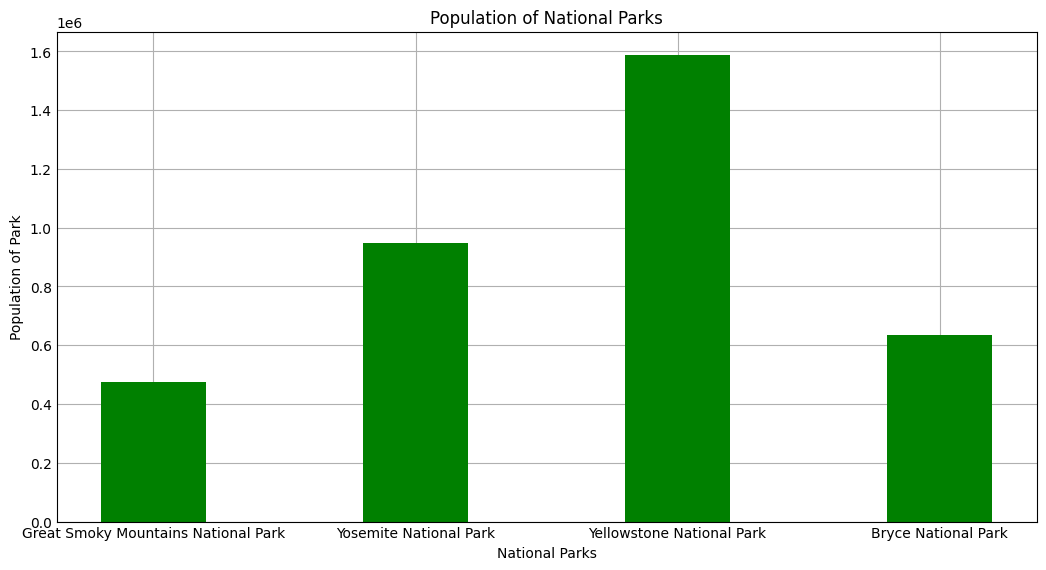

In [15]:
# Populations of parks
park_pops = {'Great Smoky Mountains National Park':0, 'Yosemite National Park':0, 'Yellowstone National Park':0, 'Bryce National Park':0}

for index, row in inner_merge_df.iterrows():
    park_pops[row[1]] += row[2]

#for creating bar graph
plt.style.use('_mpl-gallery')
x = park_pops.keys()
y = park_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

{'Great Smoky Mountains National Park': {'Mammal': 21056, 'Bird': 42869, 'Reptile': 5841, 'Amphibian': 5876, 'Fish': 9482, 'Vas. Plant': 364882, 'NonVas. Plant': 24857}, 'Yosemite National Park': {'Mammal': 42533, 'Bird': 86612, 'Reptile': 11779, 'Amphibian': 11713, 'Fish': 19137, 'Vas. Plant': 727895, 'NonVas. Plant': 49783}, 'Yellowstone National Park': {'Mammal': 70701, 'Bird': 144300, 'Reptile': 20061, 'Amphibian': 19937, 'Fish': 31459, 'Vas. Plant': 1218162, 'NonVas. Plant': 83021}, 'Bryce National Park': {'Mammal': 28830, 'Bird': 58590, 'Reptile': 8141, 'Amphibian': 7542, 'Fish': 12823, 'Vas. Plant': 484373, 'NonVas. Plant': 32992}}


AttributeError: 'numpy.ndarray' object has no attribute 'barh'

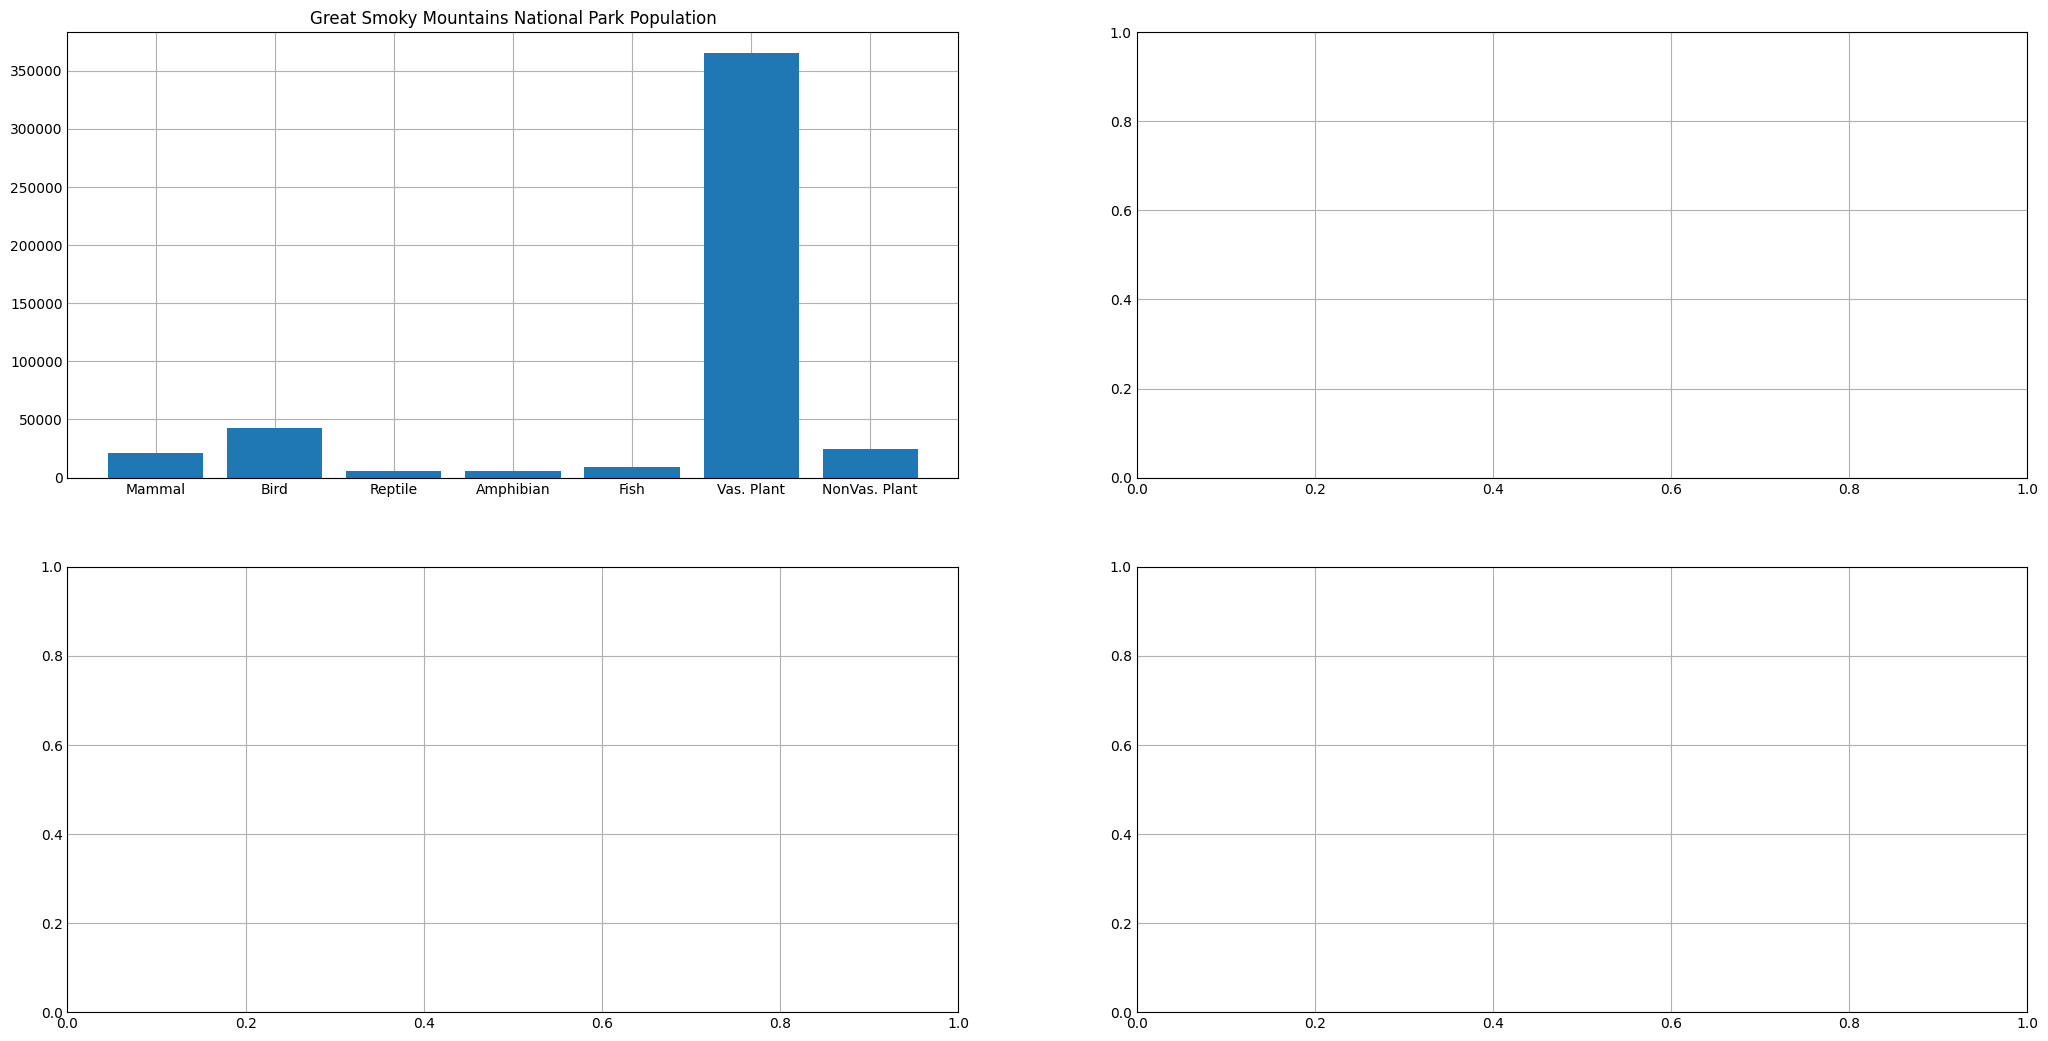

In [28]:
park_pop_categories = {'Great Smoky Mountains National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                              'Amphibian':0, 'Fish':0, 'Vas. Plant':0,'NonVas. Plant':0}, 

                       'Yosemite National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                 'Amphibian':0, 'Fish':0, 'Vas. Plant':0,'NonVas. Plant':0}, 

                       'Yellowstone National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                                    'Amphibian':0, 'Fish':0, 'Vas. Plant':0,'NonVas. Plant':0},

                       'Bryce National Park':{'Mammal':0 ,'Bird':0, 'Reptile':0, 
                                              'Amphibian':0, 'Fish':0, 'Vas. Plant':0,'NonVas. Plant':0}}
#TODO: get working subplots. A plot per park showing number of 
for index, row in inner_merge_df.iterrows():
    park_pop_categories[row[1]][row[3]] += row[2]

print(park_pop_categories)


fig, a = plt.subplots(2,2, figsize=(20,10))

#Code for Great Smoky Mountains Graph
a[0][0].bar(park_pop_categories['Great Smoky Mountains National Park'].keys(), park_pop_categories['Great Smoky Mountains National Park'].values())
a[0][0].set_title('Great Smoky Mountains National Park Population')
bars_great_smoky = a.barh(park_pop_categories['Great Smoky Mountains National Park'].keys(), park_pop_categories['Great Smoky Mountains National Park'].values())
a[0][0].bar_label(bars_great_smoky)


a[0][1].bar(park_pop_categories['Yosemite National Park'].keys(), park_pop_categories['Yosemite National Park'].values())



plt.show()



In [ ]:
# 3) Per park, populations of each category